Colab *main* Session dedicated to the training phase, creation of the .json annotation files and evaluation of a model's checkpoint.



# Mounting data from Google Drive

In [1]:
#Mount the Goole Drive repository into the Colab Session (in order to access
#the training/testing data)

from google.colab import drive
from os.path import join

drive.mount('/content/google_drive')

Mounted at /content/google_drive


# Annotation formatting: from AVD to MSCOCO

In [ ]:
#Script to transform the ground truth annotations from AVD to COCO format
!python google_drive/MyDrive/DL_Project/objectDetectionCode/AVD_to_COCO.py

Annotation file successfully written


# Training phase

The following command executes the training procedure on the whole training dataset, in particolar, on the following scenes: 
'Home_001_1',                    'Home_002_1','Home_003_1',                    'Home_004_1','Home_005_1',          'Home_006_1','Home_007_1',                    'Home_008_1','Home_010_1',                    'Home_011_1','Home_014_1',                 'Office_001_1'


In [ ]:
#Training command with its parameters (only 1 GPU is used)
!python -m torch.distributed.launch --nproc_per_node=1 --use_env google_drive/MyDrive/DL_Project/objectDetectionCode/train.py\
    --dataset coco --model fasterrcnn_resnet50_fpn --epochs 26\
    --lr-steps 16 22 --aspect-ratio-group-factor 3\
    --lr 0.001 --batch-size 8\
    --data-path 'google_drive/MyDrive/DL_Project/'\
    --output-dir 'google_drive/MyDrive/DL_Project/checkpoints'\
    --resume 'google_drive/MyDrive/DL_Project/checkpoints/model_24.pth'

# Detection on single images (for qualitative results)

In [ ]:
#Call the detect.py file (performs object detection on a single (or more) choosen image)
!python google_drive/MyDrive/DL_Project/objectDetectionCode/detect.py \
    --difficulty 'easy'\
    --checkpoint-model 'google_drive/MyDrive/DL_Project/checkpoints/model_24.pth'\
    --threshold '0.5'\
    --num-images 2


Selected difficulty:  easy
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
Selected image:  000520003850101.jpg
Scores of the detected objects:
Predicted object:  progresso_new_england_clam_chowder  with score:  0.99480283
Predicted object:  coca_cola_glass_bottle  with score:  0.992034
Predicted object:  nature_valley_sweet_and_salty_nut_almond  with score:  0.7632372
Predicted object:  softsoap_white  with score:  0.6416099
Predicted object:  softsoap_gold  with score:  0.63568956
Predicted object:  nature_valley_sweet_and_salty_nut_cashew  with score:  0.257843
Predicted object:  nature_valley_sweet_and_salty_nut_roasted_mix_nut  with score:  0.25478172
Predicted object:  nutrigrain_harvest_blueberry_bliss  with score:  0.23512077
Predicted object:  honey_bunches_of_oats_with_almonds  with score:  0.1307449
Predicted object:  nutrigrain_harvest_blueberry_bliss  with score:  0.121005155
Predicted object:  quaker_chewy_low_fat_chocolate_chunk  with 

Respectively the first (000520003850101.jpg) and second (001510001080101.jpg) images to which object detection is applied. These images were randomly selected from the "easy" portion of the testset.

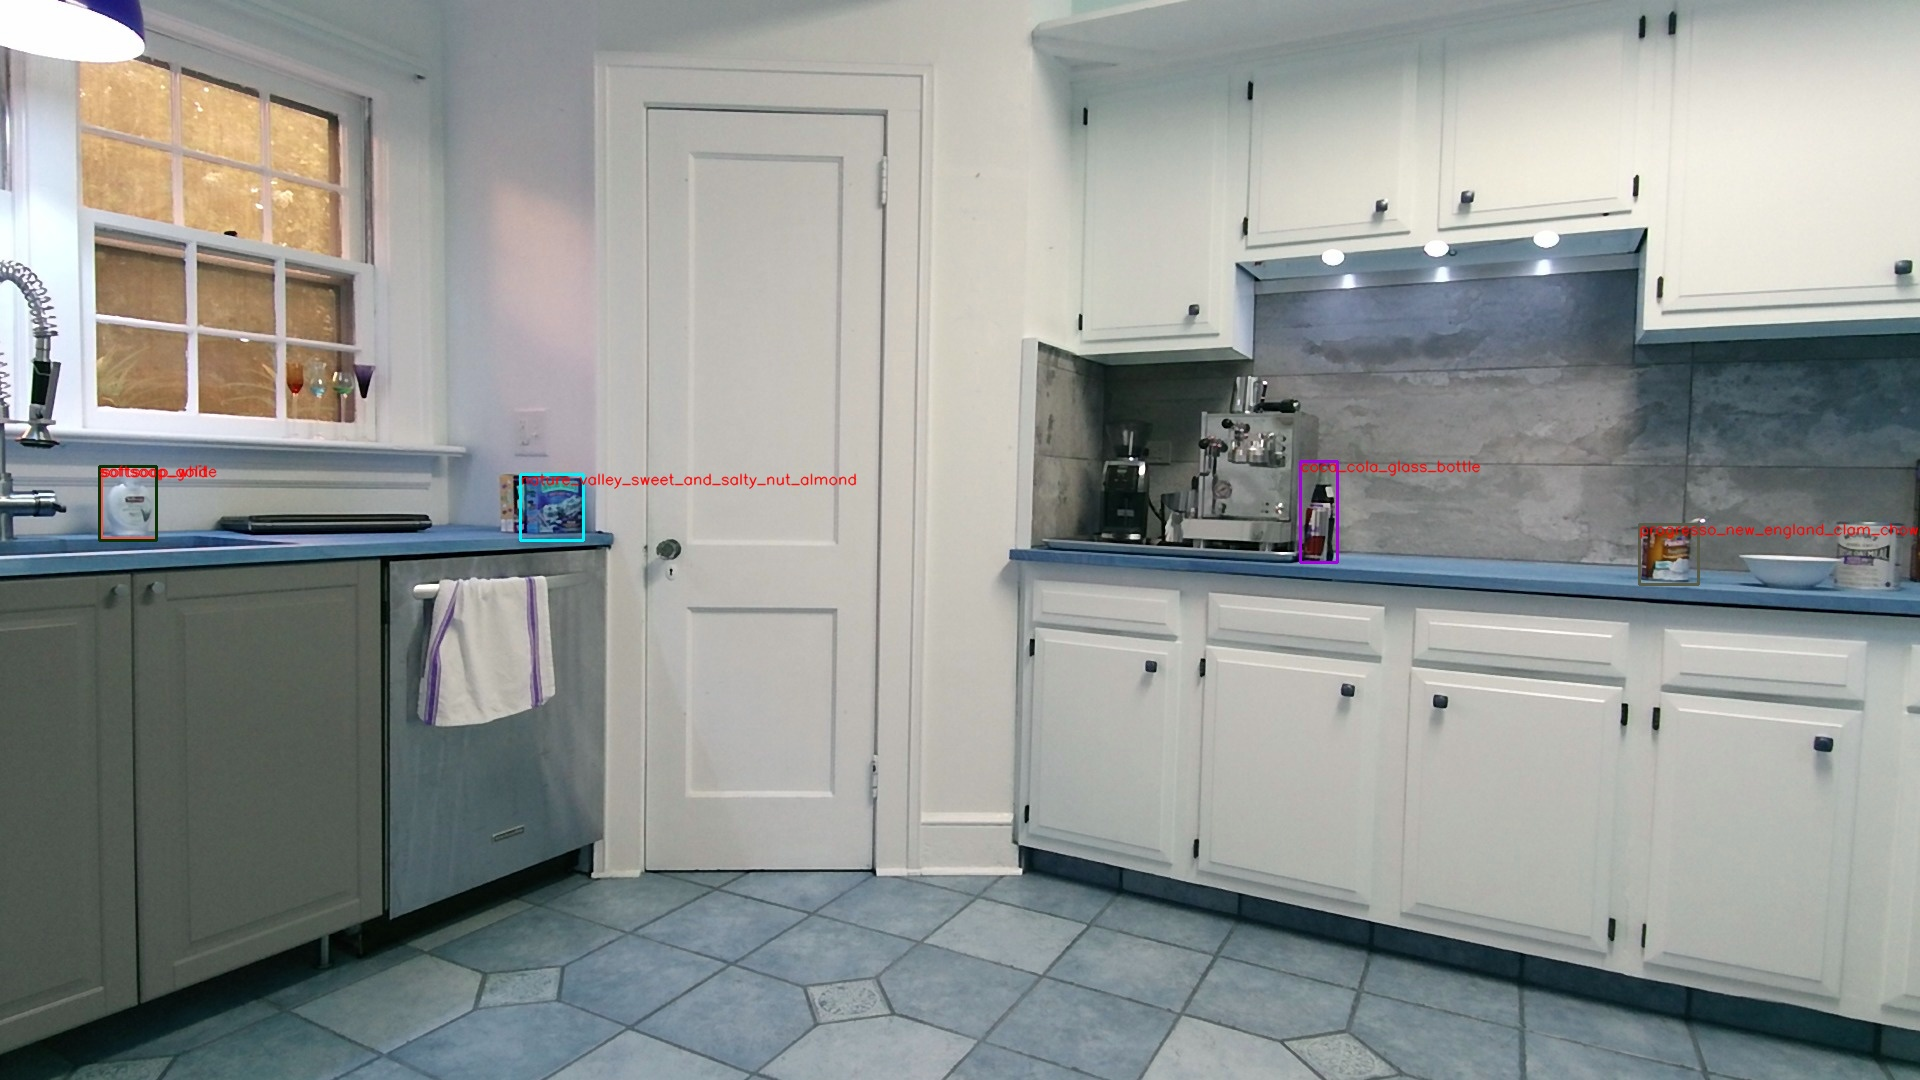

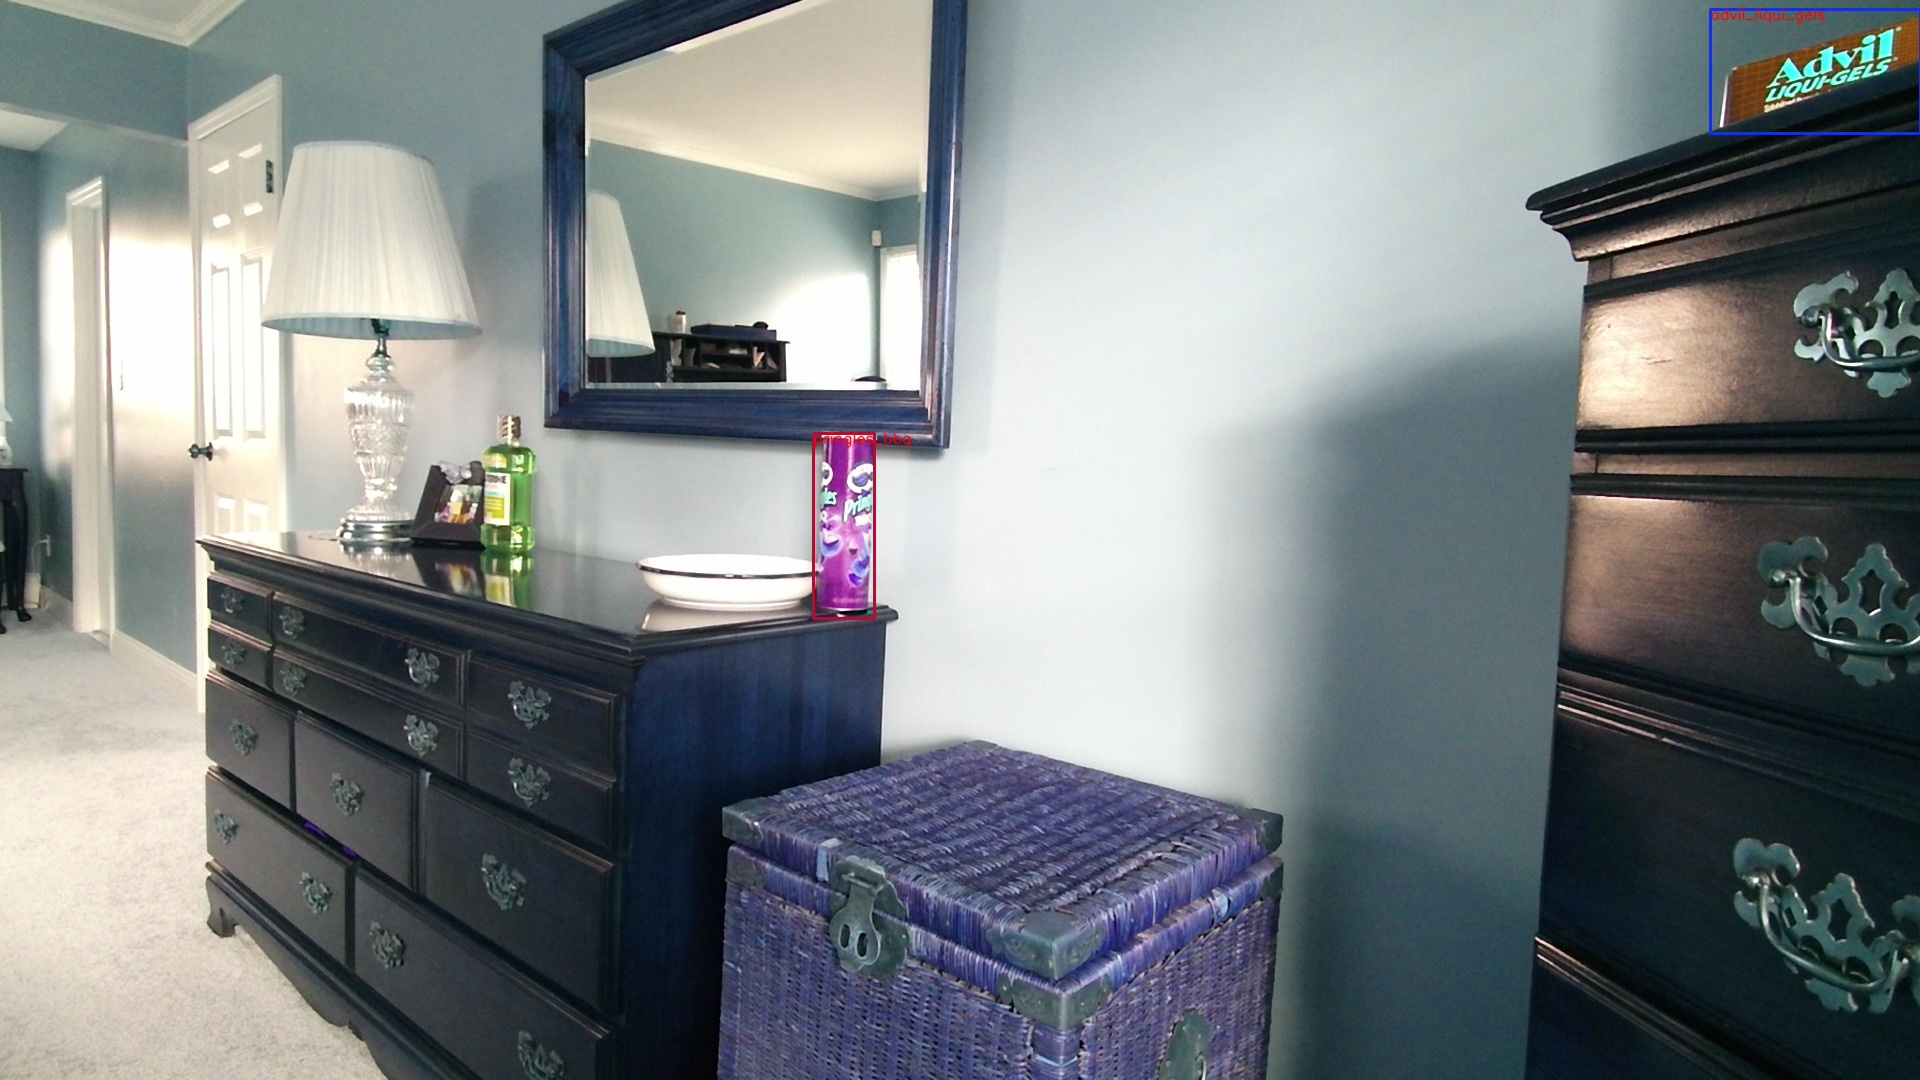

In [ ]:
#Call the detect.py file (performs object detection on a single (or more) choosen image)
!python google_drive/MyDrive/DL_Project/objectDetectionCode/detect.py \
    --difficulty 'hard'\
    --checkpoint-model 'google_drive/MyDrive/DL_Project/checkpoints/model_24.pth'\
    --threshold '0.5'\
    --num-images 3


Selected difficulty:  hard
loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
Selected image:  000320009810101.jpg
Scores of the detected objects:
Predicted object:  hunts_sauce  with score:  0.8041463
Predicted object:  nutrigrain_harvest_blueberry_bliss  with score:  0.7716258
Predicted object:  spongebob_squarepants_fruit_snaks  with score:  0.2754096
Predicted object:  paper_plate  with score:  0.191576
Predicted object:  nature_valley_sweet_and_salty_nut_almond  with score:  0.17164283
Predicted object:  red_bull  with score:  0.13323002
Predicted object:  hersheys_bar  with score:  0.07082294


Successfully saved image 1 !


Selected image:  000420012350101.jpg
Scores of the detected objects:
Predicted object:  hersheys_bar  with score:  0.69854146
Predicted object:  nutrigrain_harvest_blueberry_bliss  with score:  0.67125404


Successfully saved image 2 !


Selected image:  000420001720101.jpg
Scores of the detected objects:
Predicted object:  so

Respectively the first (000320009810101.jpg), second (000420012350101.jpg) and third (000420001720101.jpg) images to which object detection is applied. These images were randomly selected from the "hard" portion of the testset.

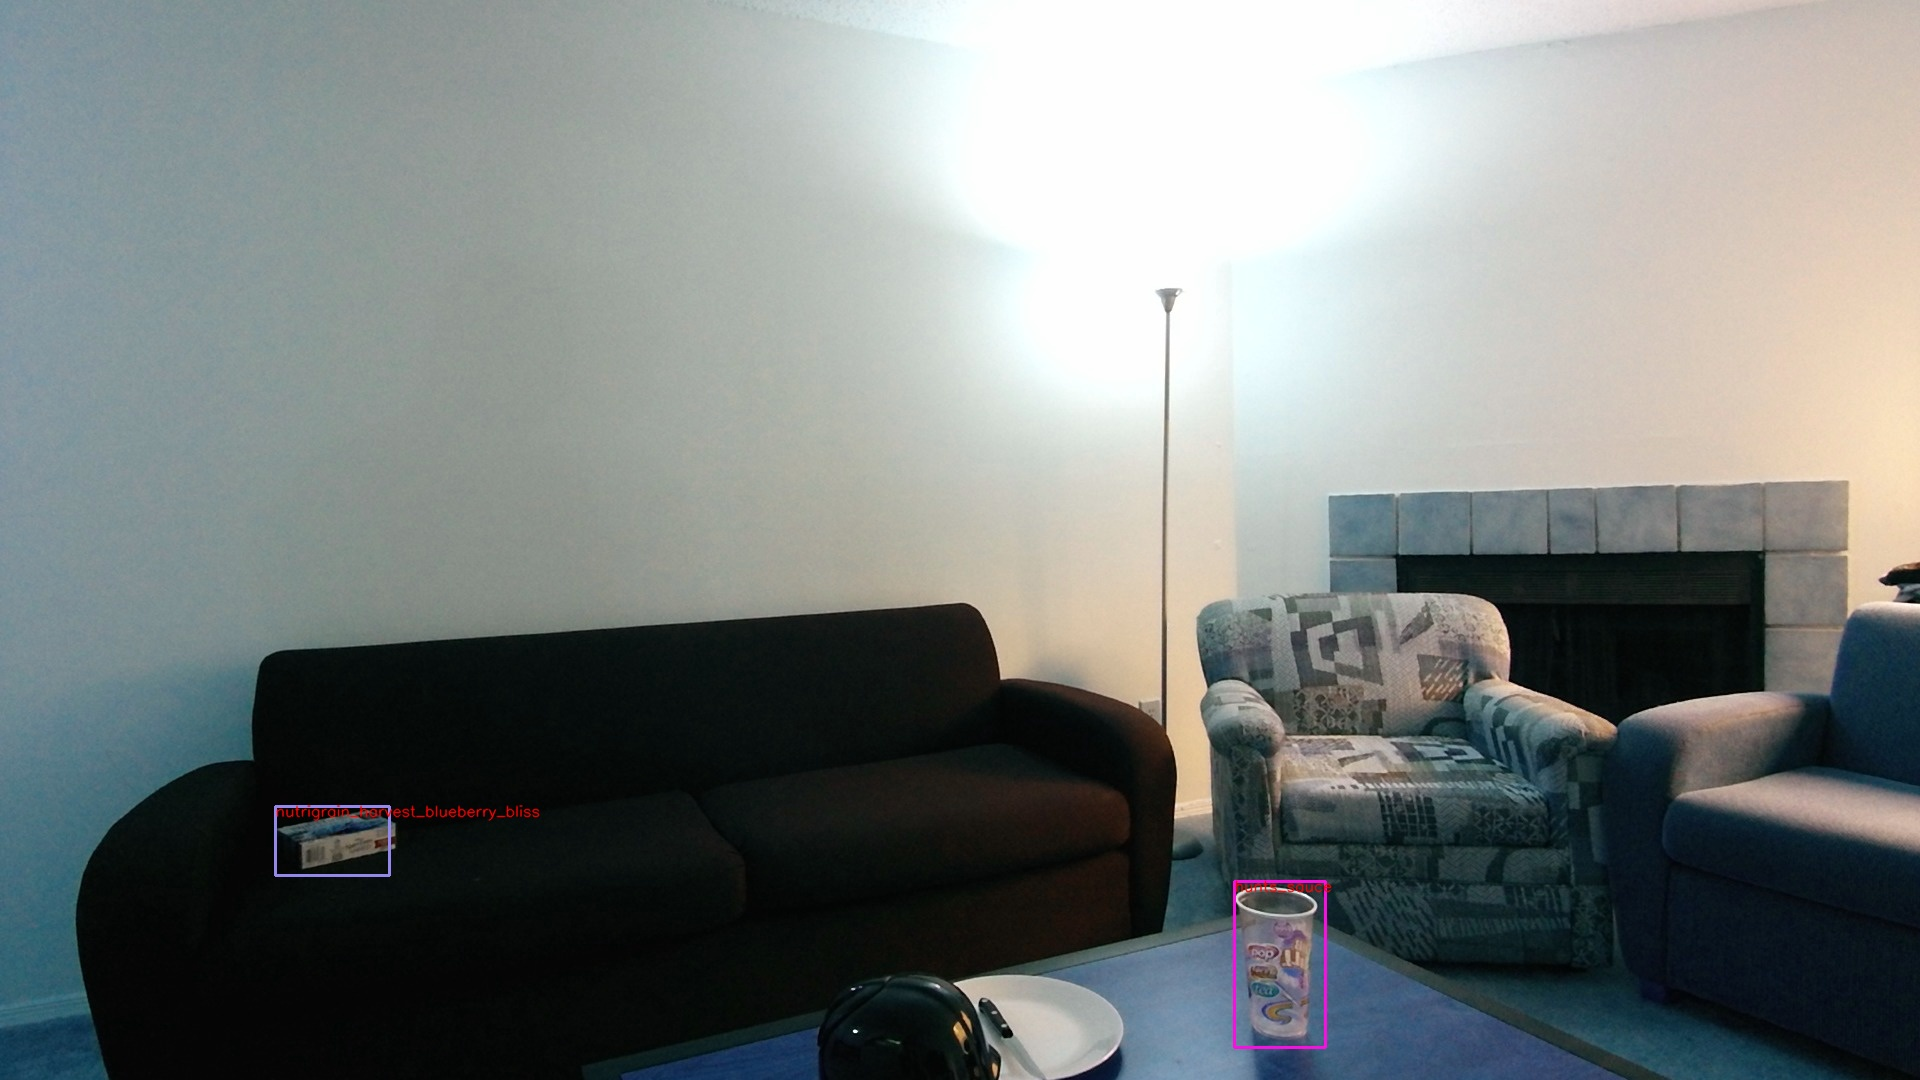

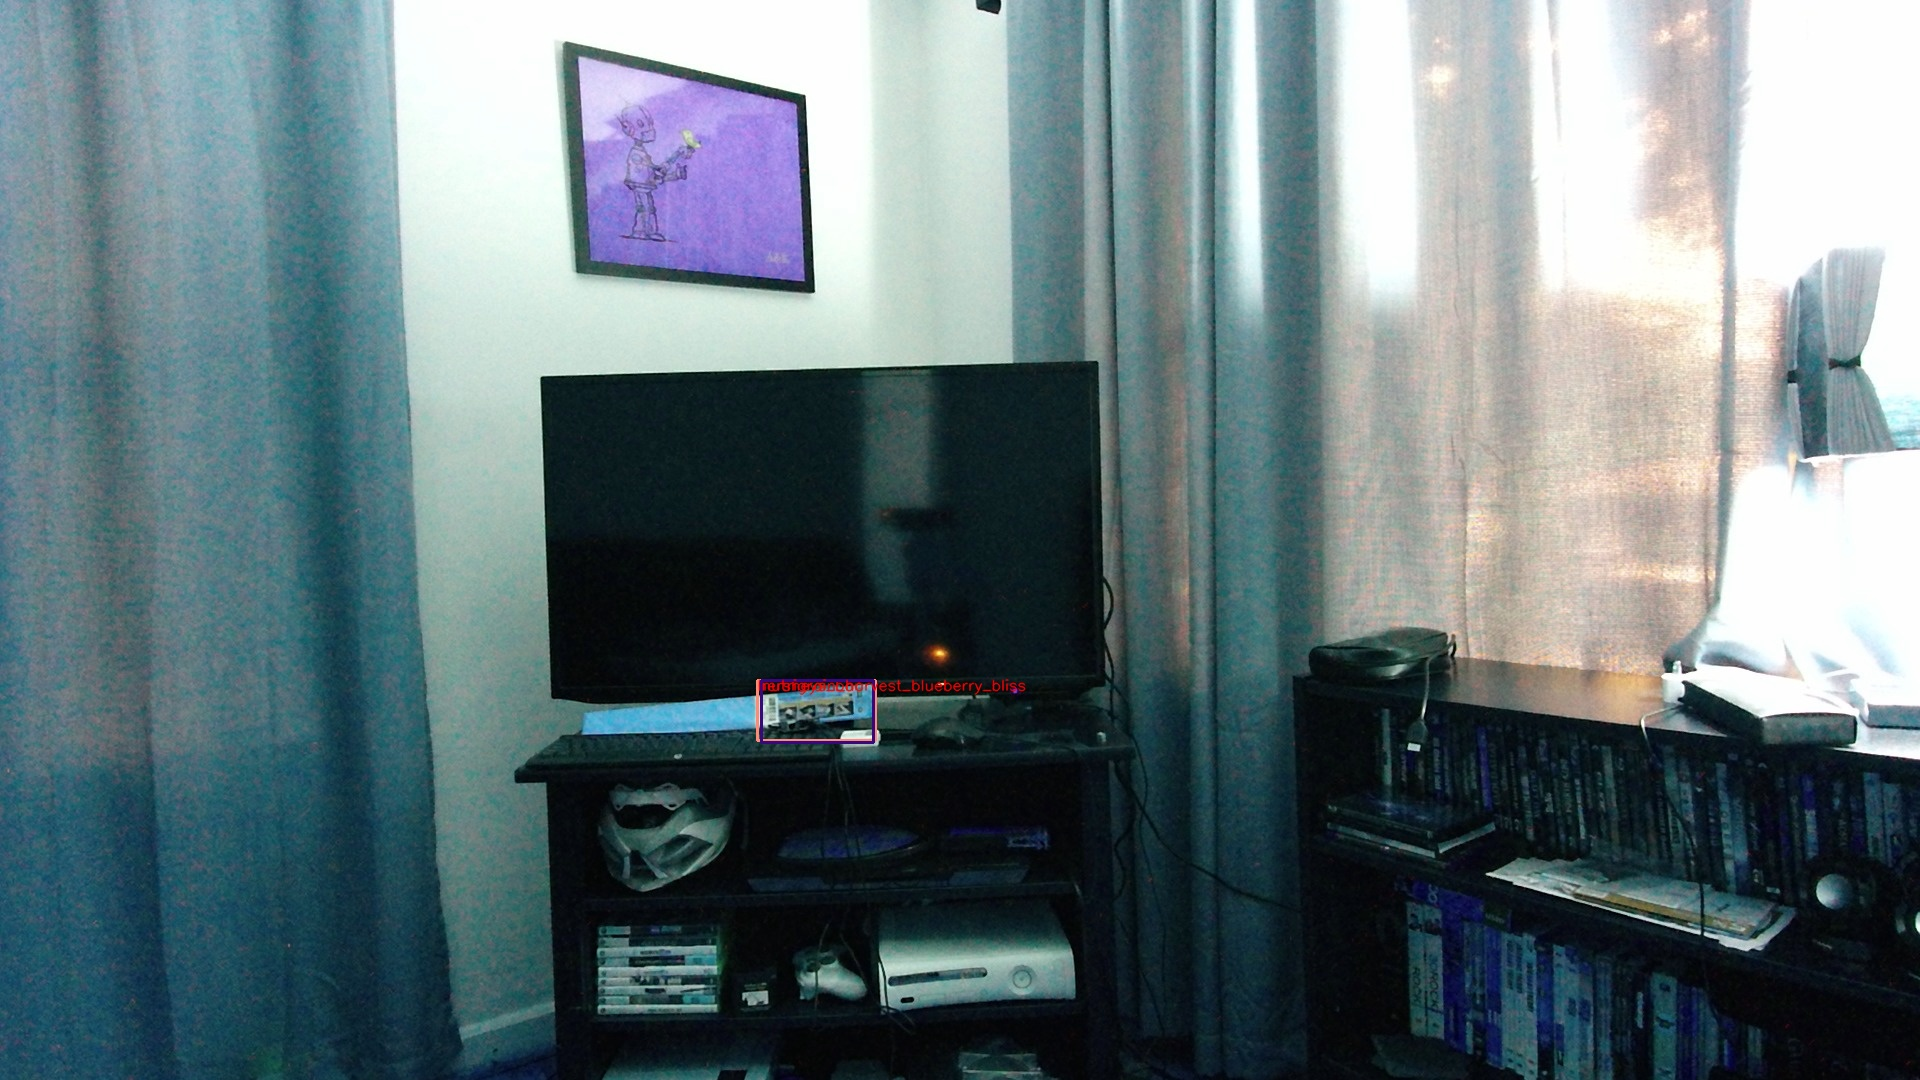

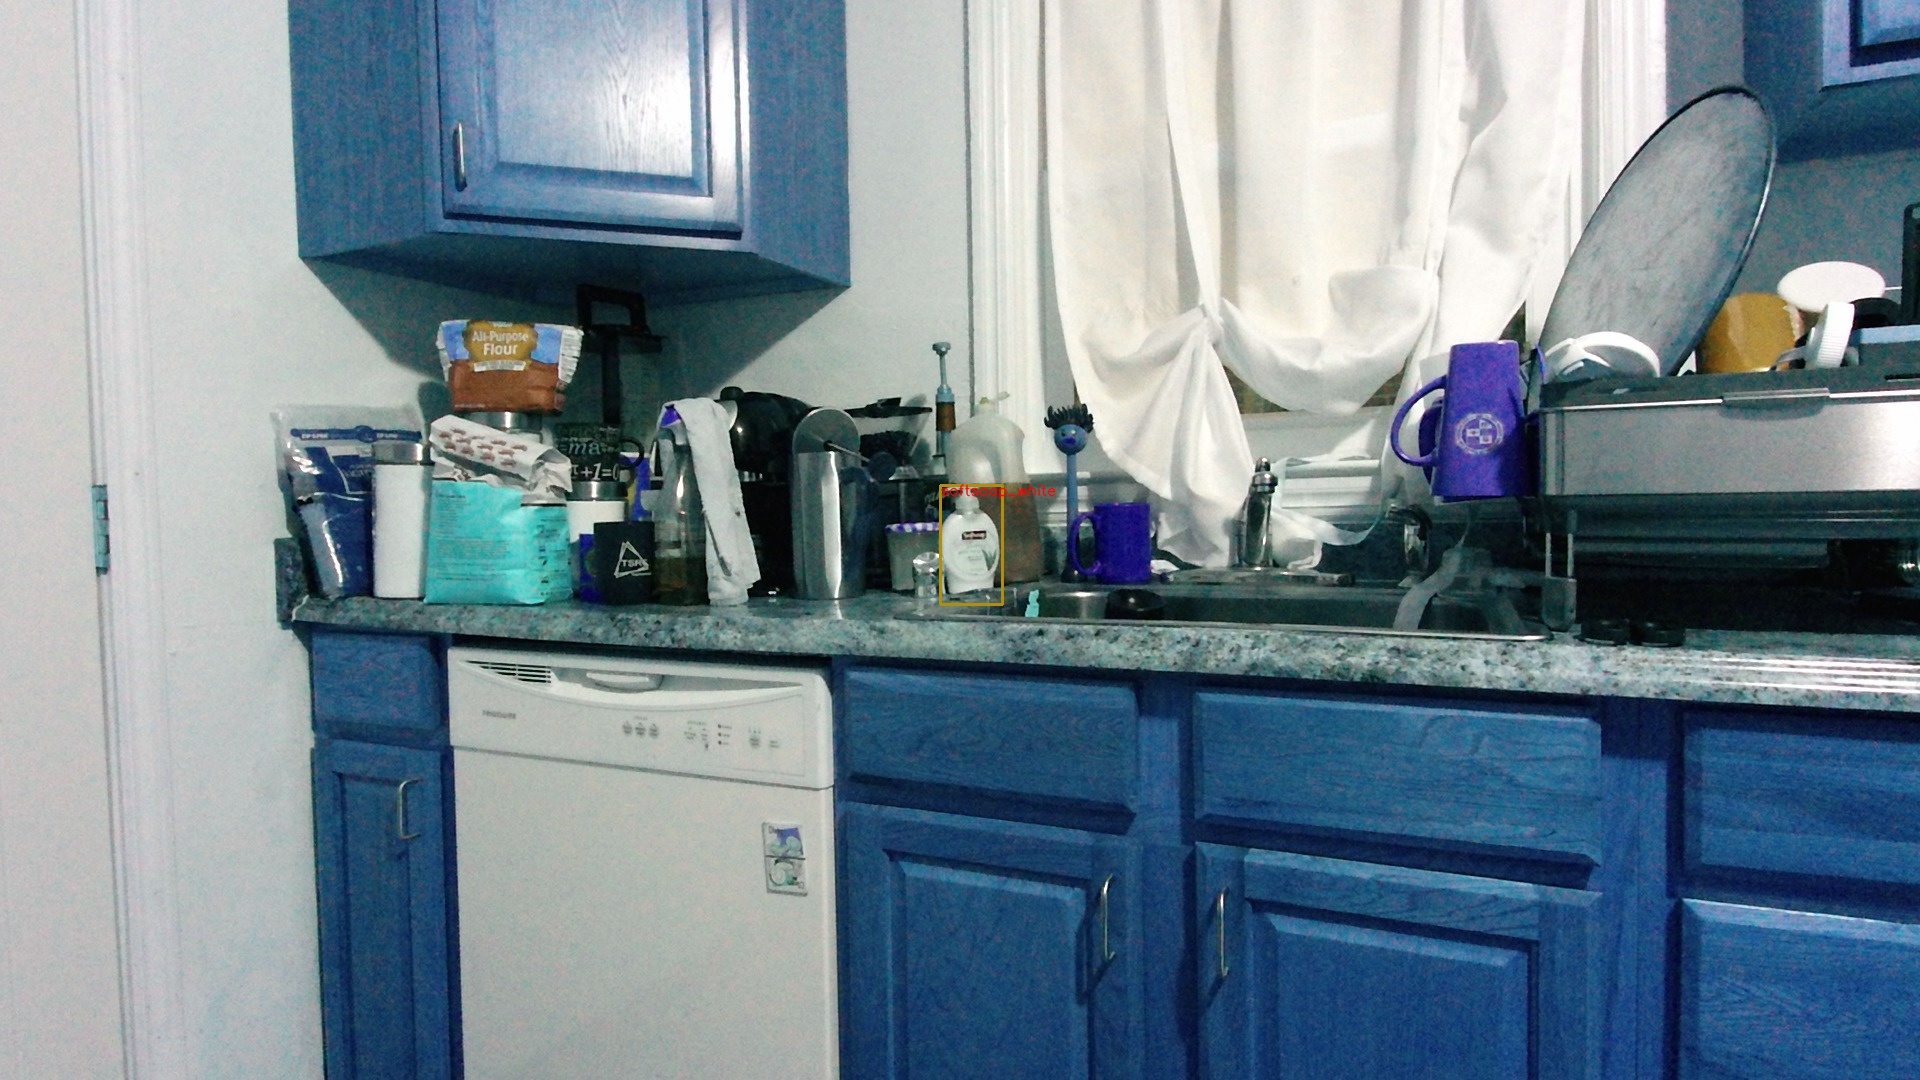

# Evaluation on a specific testset's subset

The following command executes the evaluation procedure (the same that we have after each training epoch) on the easy, medium or hard subset of the testset.

In [ ]:
#Evaluation with the option to choose the testing dataset's difficulty:
#Easy:   Home005_2 and Home015_1
#Medium: Home001_2, Home016_1, Home014_2
#Hard:   Home003_2, Home004_2, Home013_1

!python -m torch.distributed.launch --nproc_per_node=1 --use_env google_drive/MyDrive/DL_Project/objectDetectionCode/evaluatePerDifficulty.py\
    --dataset coco --model fasterrcnn_resnet50_fpn\
    --resume 'google_drive/MyDrive/DL_Project/checkpoints/model_24.pth'\
    --data-path 'google_drive/MyDrive/DL_Project/'\
    --difficulty 'medium'


| distributed init (rank 0): env://
Namespace(aspect_ratio_group_factor=3, batch_size=2, data_path='google_drive/MyDrive/DL_Project/', dataset='coco', device='cuda', difficulty='medium', dist_backend='nccl', dist_url='env://', distributed=True, epochs=26, gpu=0, lr=0.02, lr_gamma=0.1, lr_step_size=8, lr_steps=[16, 22], model='fasterrcnn_resnet50_fpn', momentum=0.9, output_dir='.', pretrained=False, print_freq=20, rank=0, resume='google_drive/MyDrive/DL_Project/checkpoints/model_24.pth', rpn_score_thresh=None, start_epoch=0, trainable_backbone_layers=2, weight_decay=0.0001, workers=0, world_size=1)
Loading data
loading annotations into memory...
Done (t=0.23s)
creating index...
index created!
actual 11061

Selected difficuly:  medium 

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
Creating data loaders
Using [0, 0.5, 0.6299605249474366, 0.7937005259840997, 1.0, 1.2599210498948732, 1.5874010519681994, 2.0, inf] as bins for aspect ratio quantization
Co